# Removal of missing values

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('D:\Data Analytics\Python Scripts\Statistics\Missing_values\data_science_job.csv')

In [86]:
df.shape

(19158, 13)

In [87]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [88]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [89]:
cca_var = [i for i in df.columns if df[i].isnull().mean()*100<5.0 and df[i].isnull().mean()*100>0.0]
cca_var

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [90]:
new_df = df[[
    "city_development_index",
    "enrolled_university",
    "education_level",
    "experience",
    "training_hours",
]]



In [91]:
new_df.dropna(inplace=True)
new_df

C:\Users\harib\AppData\Local\Temp\ipykernel_5384\730474185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


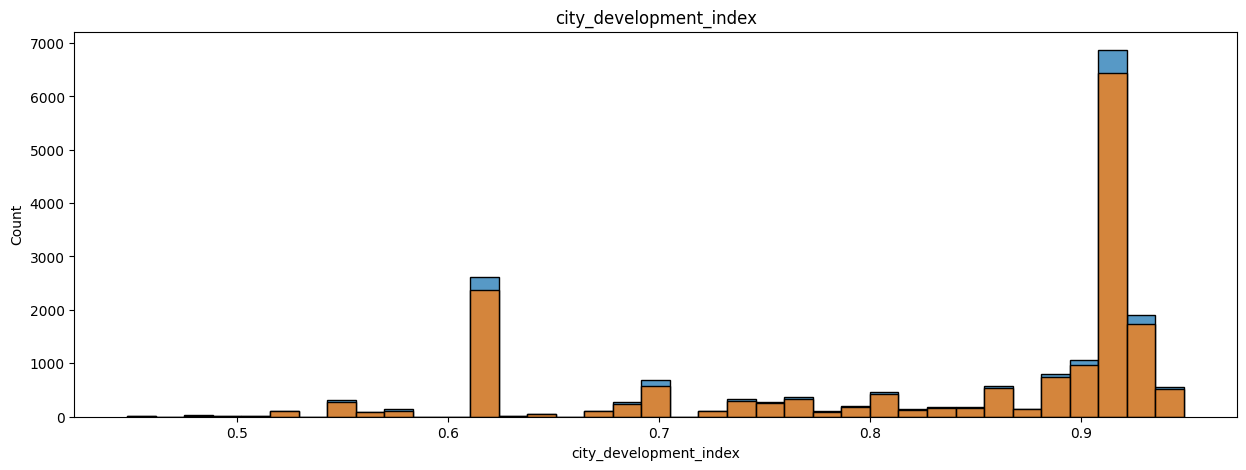

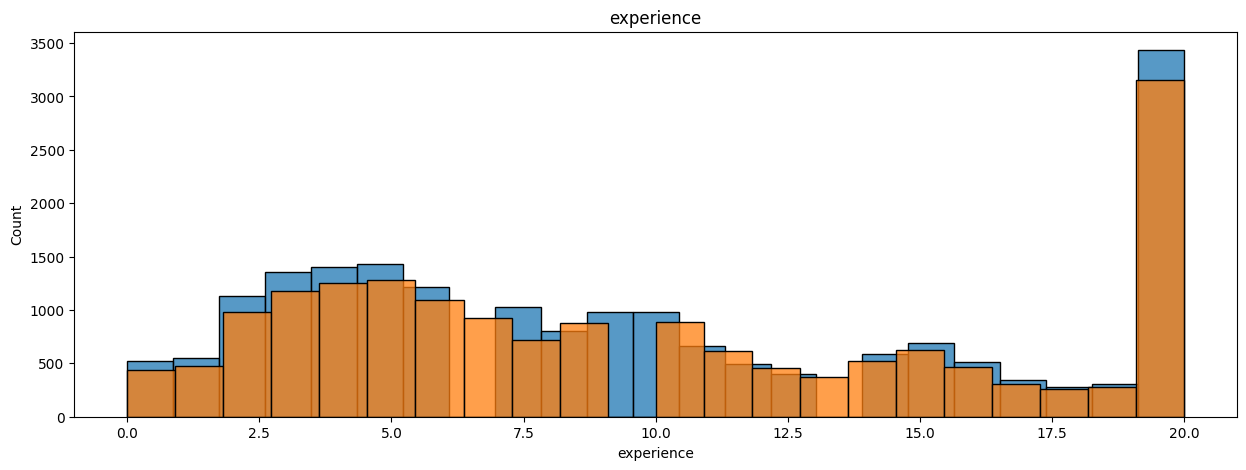

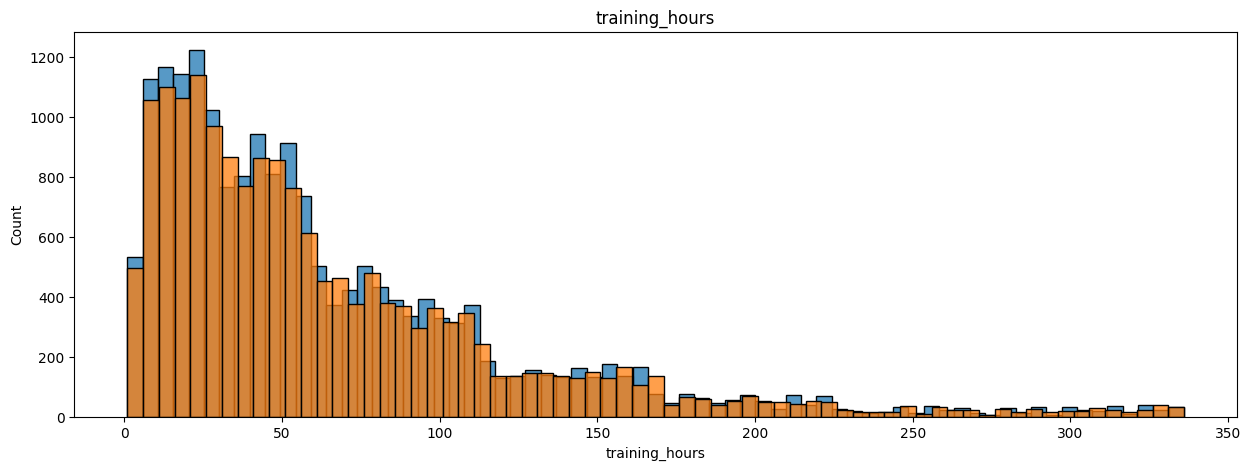

In [92]:
for i in [
    "city_development_index",
    "experience",
    "training_hours",
]:
    plt.figure(figsize=(15, 5))
    sns.histplot(df[i])
    sns.histplot(new_df[i])
    plt.title(i)

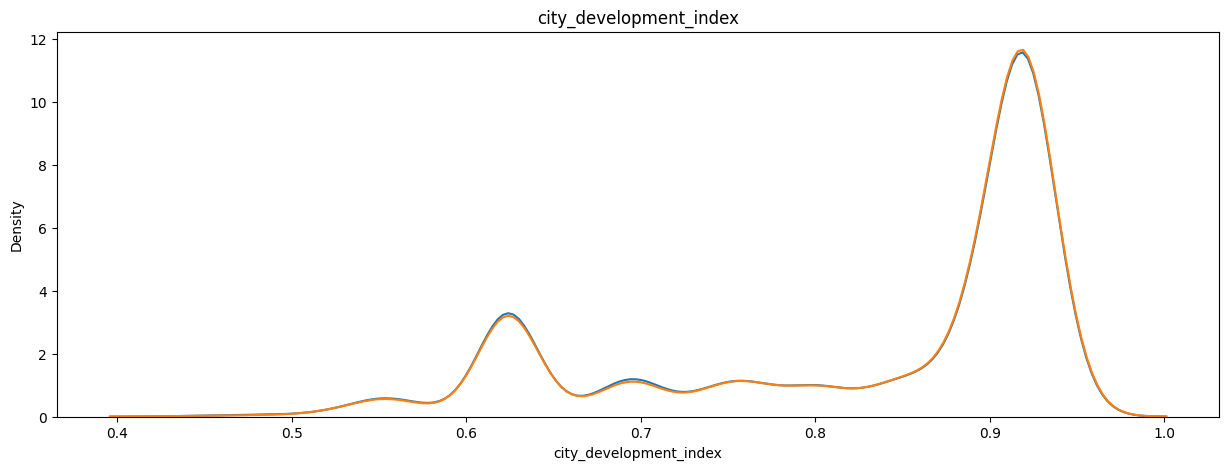

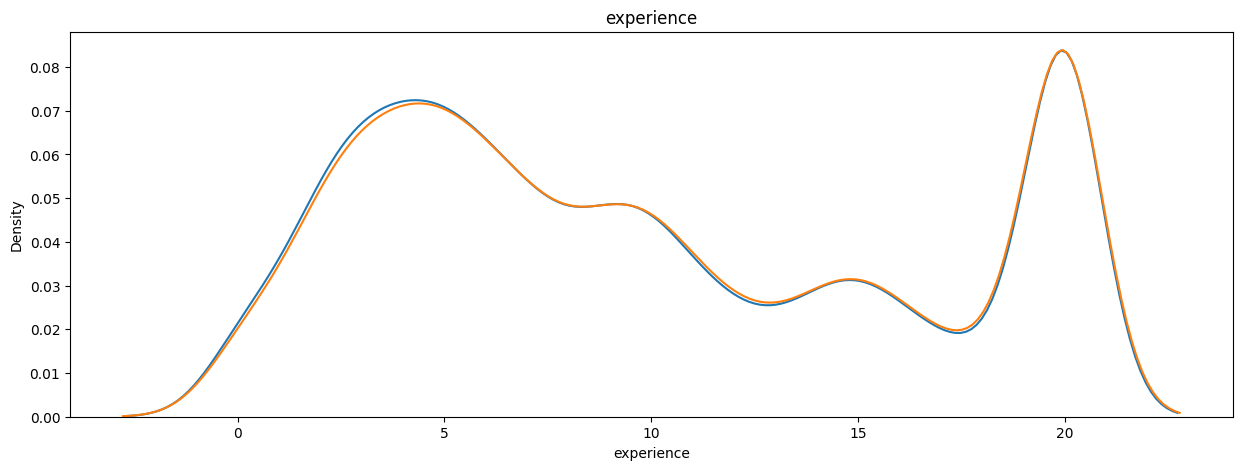

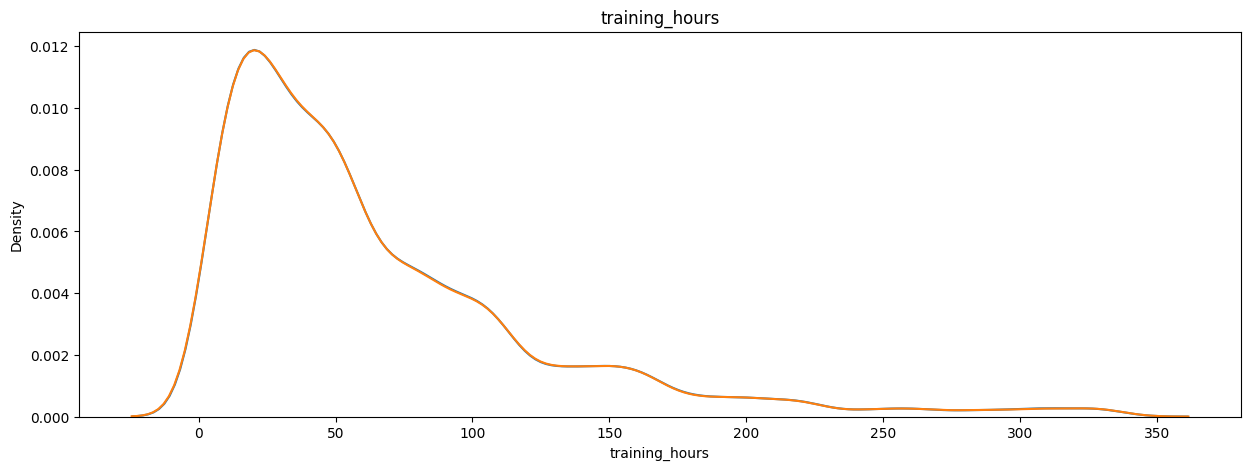

In [93]:
for i in [
    "city_development_index",
    "experience",
    "training_hours",
]:
    plt.figure(figsize=(15, 5))
    sns.kdeplot(df[i])
    sns.kdeplot(new_df[i])
    plt.title(i)

## Comparision of Categorical Variables 

In [103]:
df[[ "enrolled_university",
    "education_level",]].nunique()

enrolled_university    3
education_level        5
dtype: int64

In [113]:
camp = pd.concat([
    df["enrolled_university"].value_counts() / len(df),
    new_df["enrolled_university"].value_counts() / len(df),
], axis = 1)

camp.columns = ['Original','Filtered']
camp

,Original,Filtered
enrolled_university,,
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469


In [114]:
camp = pd.concat([
    df["education_level"].value_counts() / len(df),
    new_df["education_level"].value_counts() / len(df),
], axis = 1)

camp.columns = ['Original','Filtered']
camp

,Original,Filtered
education_level,,
Graduate,0.605387,0.555904
Masters,0.227633,0.209938
High School,0.105282,0.096304
Phd,0.021610,0.019835
Primary School,0.016077,0.014876
